# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [3]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [4]:
# Przykłady 
m_10 = main.random_matrix_Ab(10)
m_20 = main.random_matrix_Ab(20)
m_50 = main.random_matrix_Ab(50)
m_100 = main.random_matrix_Ab(100)
m_1000 = main.random_matrix_Ab(1000)
print("Przykład dla m = 10\n macierz = ", m_10[0], "\nwektor = ", m_10[1])
print("\nPrzykład dla m = 20\n macierz = ", m_20[0], "\nwektor = ", m_20[1])
print("\nPrzykład dla m = 50\n macierz = ", m_50[0], "\nwektor = ", m_50[1])
print("\nPrzykład dla m = 100\n macierz = ", m_100[0], "\nwektor = ", m_100[1])
print("\nPrzykład dla m = 1000\n macierz = ", m_1000[0], "\nwektor = ", m_1000[1])

Przykład dla m = 10
 macierz =  [[2 1 0 8 5 8 8 9 6 5]
 [9 0 5 3 2 1 2 8 1 0]
 [6 1 7 9 3 5 9 1 4 0]
 [4 6 9 1 9 2 3 4 3 5]
 [9 1 0 9 8 3 2 8 8 3]
 [8 7 2 7 4 5 0 2 3 3]
 [0 3 2 8 6 0 9 2 9 9]
 [4 3 0 6 2 9 0 5 5 8]
 [1 8 5 7 3 3 6 6 9 5]
 [3 2 4 7 7 0 2 4 3 5]] 
wektor =  [0 2 2 8 6 8 0 2 7 6]

Przykład dla m = 20
 macierz =  [[19  8  0 19  8  2  9 11 18 16 17  2  1  5 17  3  4  1 16  1]
 [16  1  2 16 12 18  9 15 10 14  8 12  5  4 16 18 11 10  3  4]
 [ 1 13 19 16  3  1  7 13 19 12  0 11  2 16 13 19  1  6  6  8]
 [ 3 19  8 11  1  3 17  3 18 10  8 13 10  7 16 11  9  4  2  2]
 [ 7 14 19  2 19  6  6  2  9 12  9 17  4  5 14 12 12 14  1  3]
 [19  6  4  5  6 16 17  5 12  7 17 11 14  1  2  3  4  5  5  8]
 [ 8  5  3  5 15  0 10 15 18 19 12 19  1  0 12  8  2  6 14  9]
 [ 9  7  3 12  4  4 16  0 16  6 14  3  5  0  5  7 19  6  5  7]
 [ 8 19 12 12  6 12  5 19 19  8  8 19 19 11 19 16  5 15 15  2]
 [16 14 10  3  9  5 19  6 16 12  4 15 16  1 18 14  8 10 18  6]
 [12 17 12  8 10  7 18  1 18  7  5  0 12 

***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

In [5]:
# Zadanie 1 podpunkt 1
result_for_10 = np.linalg.solve(m_10[0], m_10[1])
result_for_20 = np.linalg.solve(m_20[0], m_20[1])
result_for_50 = np.linalg.solve(m_50[0], m_50[1])
result_for_100 = np.linalg.solve(m_100[0], m_100[1])
result_for_1000 = np.linalg.solve(m_1000[0], m_1000[1])
print("Wynik dla m = 10 to ", result_for_10) # dla reszty sprawdzenie wygląda tak samo

# Zadanie 1 podpunkt 2
residuum_for_10 = main.residual_norm(m_10[0], result_for_10, m_10[1])
residuum_for_20 = main.residual_norm(m_20[0], result_for_20, m_20[1])
residuum_for_50 = main.residual_norm(m_50[0], result_for_50, m_50[1])
residuum_for_100 = main.residual_norm(m_100[0], result_for_100, m_100[1])
residuum_for_1000 = main.residual_norm(m_1000[0], result_for_1000, m_1000[1])
print("\nSprawdzenie normy residuum dla m = 10 to ", residuum_for_10)
print("Sprawdzenie normy residuum dla m = 20 to ", residuum_for_20)
print("Sprawdzenie normy residuum dla m = 50 to ", residuum_for_50)
print("Sprawdzenie normy residuum dla m = 100 to ", residuum_for_1000)
print("Sprawdzenie normy residuum dla m = 1000 to ", residuum_for_1000)

# Zadanie 1 podpunkt 3
cond_for_matrix_A_10 = np.linalg.cond(m_10[0])
cond_for_matrix_A_20 = np.linalg.cond(m_20[0])
cond_for_matrix_A_50 = np.linalg.cond(m_50[0])
cond_for_matrix_A_100 = np.linalg.cond(m_100[0])
cond_for_matrix_A_1000 = np.linalg.cond(m_1000[0])
print("\nUwarunkowanie macierzy A dla m = 10 to ", cond_for_matrix_A_10) # dla reszty sprawdzenie wygląda tak samo 
print("Uwarunkowanie macierzy A dla m = 20 to ", cond_for_matrix_A_20)
print("Uwarunkowanie macierzy A dla m = 50 to ", cond_for_matrix_A_50)
print("Uwarunkowanie macierzy A dla m = 100 to ", cond_for_matrix_A_100)
print("Uwarunkowanie macierzy A dla m = 1000 to ", cond_for_matrix_A_1000)

# Zadanie 1 podpunkt 4
# Tak wartości maczierzy oraz ich rozmiar mają wpływ na jakość otrzymanych wyników

# Zadanie 1 podpunkt 5


for size in [m_10, m_20, m_50, m_100, m_1000]:
    print('\nTiming: ')
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(size[0], size[1])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe

Wynik dla m = 10 to  [-0.23350775  0.66229269  0.40931847  0.46097289  0.52003479 -0.0049763
 -0.72653499  0.11715423  0.15280158 -0.52046829]

Sprawdzenie normy residuum dla m = 10 to  3.418333242764116e-15
Sprawdzenie normy residuum dla m = 20 to  5.891509130072237e-14
Sprawdzenie normy residuum dla m = 50 to  8.827050307314223e-13
Sprawdzenie normy residuum dla m = 100 to  1.1617506434904798e-08
Sprawdzenie normy residuum dla m = 1000 to  1.1617506434904798e-08

Uwarunkowanie macierzy A dla m = 10 to  18.442112240639666
Uwarunkowanie macierzy A dla m = 20 to  286.45129022425886
Uwarunkowanie macierzy A dla m = 50 to  1115.2845219045773
Uwarunkowanie macierzy A dla m = 100 to  7851.009068324969
Uwarunkowanie macierzy A dla m = 1000 to  659262.3438876775

Timing: 
19.1 µs ± 2.71 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Timing: 
264 µs ± 24.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Timing: 
The slowest run took 6.91 times longer than the fastest. This c

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [6]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [7]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [8]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [9]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [10]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




In [11]:
# dla wartosci singularnych
m = [10, 20, 50, 100, 1000]
m_1 = [] 
m_2 = [] 
m_3 = [] 
for n in m:
  A, _ = main.random_matrix_Ab(n)
  sing_1 = main.log_sing_value(n, 0, 100)
  sing_2 = main.order_sing_value(n, site = "gre")
  sing_3 = main.order_sing_value(n, site = "low")
  
  A_sing_1 = main.create_matrix_from_A(A, sing_1)
  m_1.append(np.linalg.cond(A_sing_1))

  A_sing_2 = main.create_matrix_from_A(A, sing_2)
  m_2.append(np.linalg.cond(A_sing_2))

  A_sing_3 = main.create_matrix_from_A(A, sing_3)
  m_3.append(np.linalg.cond(A_sing_3))

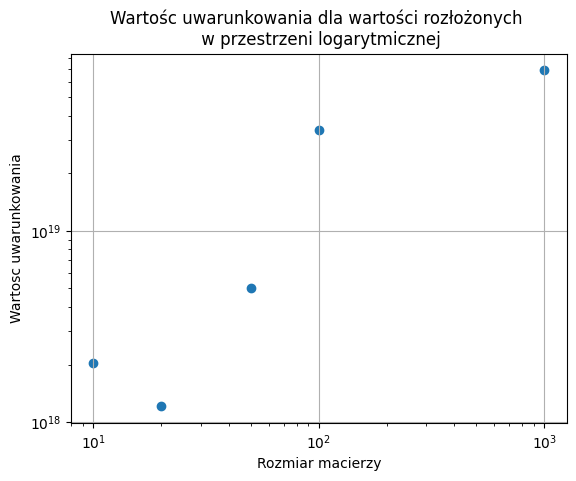

In [12]:
plt.scatter(m, m_1)
plt.title("Uwarunkowania dla wartości rozłożonych \n w skali logarytmicznej")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

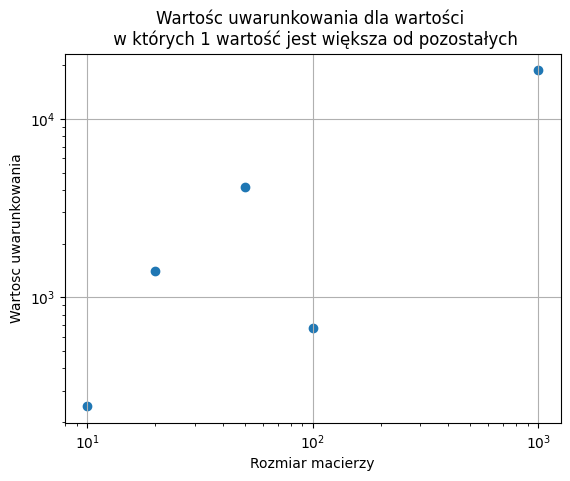

In [13]:
plt.scatter(m, m_2)
plt.title("Wartośc uwarunkowania dla wartości \n w których 1 wartość jest większa od pozostałych")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

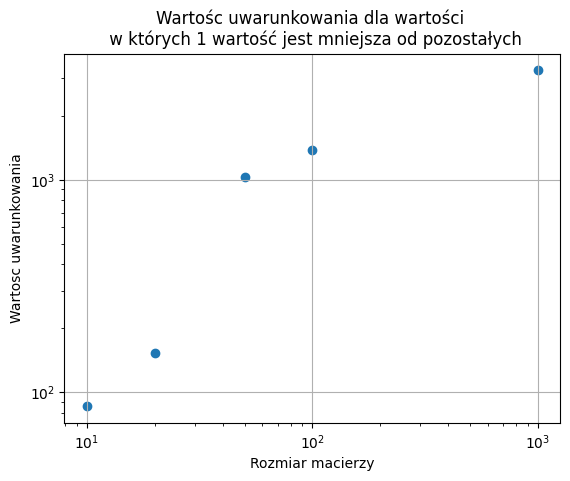

In [14]:
plt.scatter(m, m_3)
plt.title("Wartośc uwarunkowania dla wartości \n w których 1 wartość jest mniejsza od pozostałych")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

In [15]:
# dla normy residuum
m = [10, 20, 50, 100, 1000]
mr_1 = [] 
mr_2 = [] 
mr_3 = [] 
for n in m:
  A, b = main.random_matrix_Ab(n)
  sing_1 = main.log_sing_value(n, 0, 100)
  sing_2 = main.order_sing_value(n, site = "gre")
  sing_3 = main.order_sing_value(n, site = "low")
  
  A_sing_1 = main.create_matrix_from_A(A, sing_1)
  x = np.linalg.solve(A_sing_1, b)
  mr_1.append(main.residual_norm(A_sing_1, x, b))

  A_sing_2 = main.create_matrix_from_A(A, sing_2)
  x = np.linalg.solve(A_sing_2, b)
  mr_2.append(main.residual_norm(A_sing_2, x, b))

  A_sing_3 = main.create_matrix_from_A(A, sing_3)
  x = np.linalg.solve(A_sing_3, b)
  mr_3.append(main.residual_norm(A_sing_3, x, b))

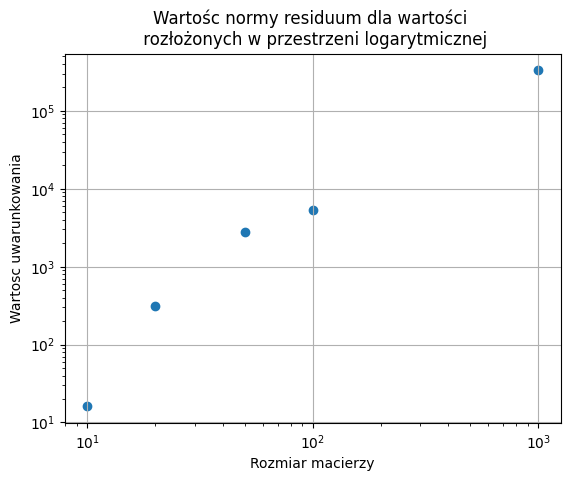

In [16]:
plt.scatter(m, mr_1)
plt.title("Wartośc normy residuum dla wartości \n rozłożonych w przestrzeni logarytmicznej")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

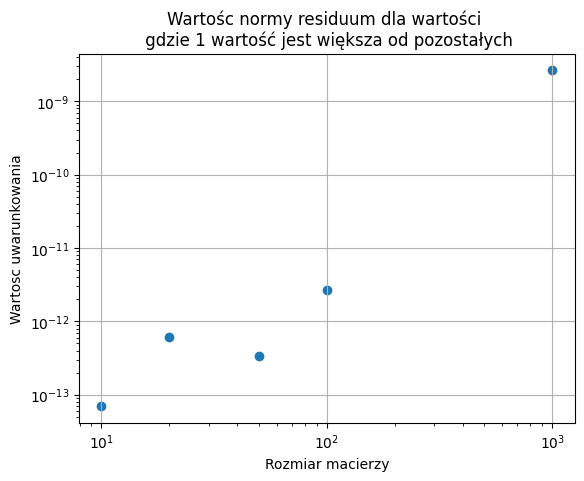

In [17]:
plt.scatter(m, mr_2)
plt.title("Wartośc normy residuum dla wartości \n gdzie 1 wartość jest większa od pozostałych")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

In [ ]:
plt.scatter(m, mr_3)
plt.title("Wartośc normy residuum dla wartości \n gdzie 1 wartość jest mniejsza od pozostałych")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Wartosc uwarunkowania")
plt.grid()

In [ ]:
# Zadanie 2 podpunkt 4
# Jeśli tylko posiadamy wartości singularne nie musimy obliczać całej macierzy

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)